In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from tqdm import tqdm
import cv2
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend
from tensorflow.keras import backend as k
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Concatenate, ReLU, Add, Activation, Input, MaxPool2D
from tensorflow.keras.layers import GlobalAveragePooling2D, UpSampling2D

In [ ]:
path = '/content/drive/MyDrive/All-datasets/Semantic segmentation dataset'

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

train_ids = sorted(next(os.walk(path))[1])

In [ ]:

train = []
mask = []
for n, i in tqdm(enumerate(train_ids)):
  a = os.listdir(path+'/'+i)
  i_path=path+'/'+i+'/'+a[0]
  m_path=path+'/'+i+'/'+a[1]
  a=os.listdir(i_path)
  b=os.listdir(m_path)
  for j in a:
    a=i_path+'/'+j
    c=cv2.imread(i_path+'/'+j)
    c=cv2.resize(c,(IMG_HEIGHT, IMG_WIDTH))
    train.append(c)
    b=a.replace("jpg", "png")
    b=b.replace("images", "masks")
    m=cv2.imread(b)
    m=cv2.resize(m,(IMG_HEIGHT, IMG_WIDTH))
    mask.append(m)

mask = np.array(mask)
train = np.array(train)

8it [00:24,  3.04s/it]


In [ ]:

inputs = tf.keras.layers.Input((224,224,3))

c1 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(inputs)
c1 = BatchNormalization()(c1)
c1 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(c1)
c1 = BatchNormalization()(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(p1)
c2 = BatchNormalization()(c2)
c2 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(c2)
c2 = BatchNormalization()(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(p2)
c3 = BatchNormalization()(c3)
c3 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(c3)
c3 = BatchNormalization()(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(p3)
c4 = BatchNormalization()(c4)
c4 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(c4)
c4 = BatchNormalization()(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same')(p4)
c5 = BatchNormalization()(c5)
c5 = tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same')(c5)
c5 = BatchNormalization()(c5)
p5 = tf.keras.layers.MaxPooling2D((2,2))(c5)

c6 = tf.keras.layers.Conv2D(1024,(3,3),activation='relu',padding='same')(p5)
c6 = BatchNormalization()(c6)
c6 = tf.keras.layers.Conv2D(1024,(3,3),activation='relu',padding='same')(c6)
c6 = BatchNormalization()(c6)

u7 = UpSampling2D((2, 2), interpolation="bilinear")(c6)
c7 = Concatenate()([u7, c5])
c7 = tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same')(c7)
c7 = BatchNormalization()(c7)
c7 = tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same')(c7)
c7 = BatchNormalization()(c7)

u8 = UpSampling2D((2, 2), interpolation="bilinear")(c7)
c8 = Concatenate()([u8, c4])
c8 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(c8)
c8 = BatchNormalization()(c8)
c8 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(c8)
c8 = BatchNormalization()(c8)

u9 = UpSampling2D((2, 2), interpolation="bilinear")(c8)
c9 = Concatenate()([u9, c3])
c9 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(c9)
c9 = BatchNormalization()(c9)
c9 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(c9)
c9 = BatchNormalization()(c9)

u10 = UpSampling2D((2, 2), interpolation="bilinear")(c9)
c10 = Concatenate()([u10, c2])
c10 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(c10)
c10 = BatchNormalization()(c10)
c10 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(c10)
c10 = BatchNormalization()(c10)

u11 = UpSampling2D((2, 2), interpolation="bilinear")(c10)
c11 = Concatenate()([u11, c1])
c11 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(c11)
c11 = BatchNormalization()(c11)
c11 = tf.keras.layers.Conv2D(32,(3,3),activation='tanh',padding='same')(c11)
c11 = BatchNormalization()(c11)

outputs = Conv2D(3, 4, padding="same", activation="softmax")(c11)
model = tf.keras.Model(inputs=[inputs],outputs=[outputs])

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

model.fit(train,mask, batch_size=16, epochs=150)

Epoch 1/150
5/5 [==============================] - 185s 35s/step - loss: 26193.0957 - accuracy: 0.7154
Epoch 2/150
5/5 [==============================] - 180s 35s/step - loss: 26173.0391 - accuracy: 0.9201
Epoch 3/150
5/5 [==============================] - 179s 35s/step - loss: 26172.7754 - accuracy: 0.9154
Epoch 4/150
5/5 [==============================] - 179s 35s/step - loss: 26169.6094 - accuracy: 0.9500
Epoch 5/150
5/5 [==============================] - 178s 35s/step - loss: 26169.3457 - accuracy: 0.9545
Epoch 6/150
5/5 [==============================] - 177s 34s/step - loss: 26169.3340 - accuracy: 0.9554
Epoch 7/150
5/5 [==============================] - 177s 34s/step - loss: 26169.6426 - accuracy: 0.9537
Epoch 8/150
5/5 [==============================] - 178s 35s/step - loss: 26169.0898 - accuracy: 0.9560
Epoch 9/150
5/5 [==============================] - 177s 34s/step - loss: 26168.8027 - accuracy: 0.9602
Epoch 10/150
5/5 [==============================] - 176s 34s/step - loss:

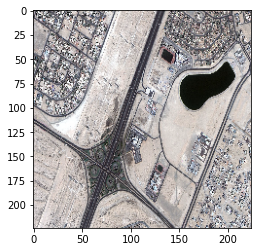

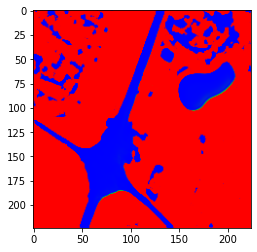

In [ ]:
testpath = '/content/drive/MyDrive/All-datasets/Semantic segmentation dataset/Tile 8/images/image_part_003.jpg'
test=cv2.imread(testpath)
test=cv2.resize(test,(224,224))
test1= np.expand_dims(test,0)
tt=model.predict(test1)
tt=np.squeeze(tt)

f, axarr = plt.subplots(1,1)
plt.imshow(test)
f, axarr = plt.subplots(1,1)
plt.imshow(tt)